In [ ]:
'''
【课程1.2】  异常值处理

异常值是指样本中的个别值，其数值明显偏离其余的观测值。
异常值也称离群点，异常值的分析也称为离群点的分析

异常值分析 → 3σ原则 / 箱型图分析
异常值处理方法 → 删除 / 修正填补

'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

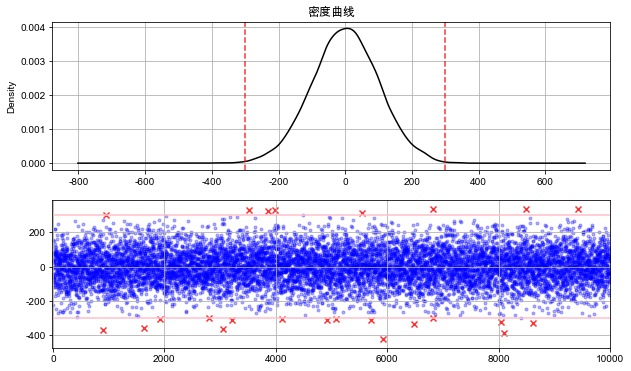

In [8]:
# 异常值分析
# （1）3σ原则：如果数据服从正态分布，异常值被定义为一组测定值中与平均值的偏差超过3倍标准差的值 → p(|x - μ| > 3σ) ≤ 0.003

data = pd.Series(np.random.randn(10000)*100)
# 创建数据

# 对数据进行正态性检验
m = data.mean()
s = data.std()
stats.kstest(data, 'norm', (m, s))
# 通过正态检验

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(2, 1, 1)
data.plot(kind='kde', grid=True, style='-k', title='密度曲线')
plt.axvline(3*s, color='r', linestyle='--', alpha=0.8)
plt.axvline(-3*s, color='r', linestyle='--', alpha=0.8)
# 绘制密度曲线

ax2 = fig.add_subplot(2, 1, 2)
error = data[np.abs(data-m) > 3*s]
data_c = data[np.abs(data-m) <= 3*s]
# 筛选出异常值和正常值

plt.scatter(data_c.index, data_c, color='b', marker='.', alpha=0.3)
plt.scatter(error.index, error, color='r', marker='x', alpha=0.8)
plt.axhline(3*s, linestyle='-', color='pink')
plt.axhline(-3*s, linestyle='-', color='pink')
plt.xlim([-10, 10010])
plt.grid()
# 图表表示

分位差为:133.509, 下限为:-265.681, 上限为:268.354
----------------------------------------------------------------------------------------
异常值有:68个
----------------------------------------------------------------------------------------


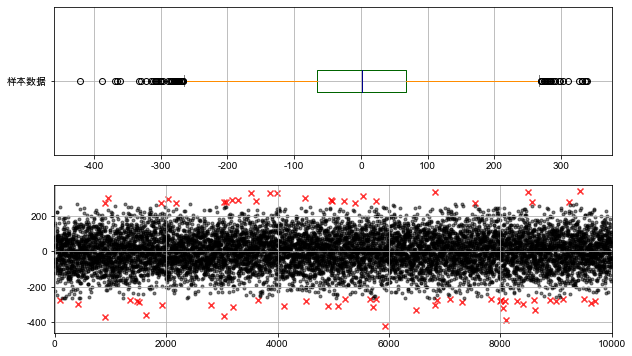

In [21]:
# 异常值分析
# (2)箱型图分析
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(2,1,1)
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(vert=False, grid=True, color=color, ax=ax1, label='样本数据')
# 箱型图看数据分布
# 以内限为界

# 计算分位差
q1 = data.quantile(q=0.25)
q3 = data.quantile(q=0.75)
iqr = q3 - q1
mi = q1 - 1.5*iqr
ma = q3 + 1.5*iqr
print('分位差为:%.3f, 下限为:%.3f, 上限为:%.3f' % (iqr, mi, ma))
print('-' * 88)

# 筛选出异常值和正常值
error = data[(data > ma) | (data < mi)]
data_c = data[(data <=ma) & (data >=mi)]
print('异常值有:%s个' % len(error))
print('-' * 88)

ax2 = fig.add_subplot(2, 1, 2)
plt.scatter(error.index, error, marker='x', color='r', alpha=0.8)
plt.scatter(data_c.index, data_c, color='k', marker='.', alpha=0.5)
plt.xlim([-10, 10010])
plt.grid()
# 图表表达